# LeR complete examples of BNS events (O4 design sensitivity)

* I am using Amplitude Spectral Density (asds) included in [bilby](https://github.com/lscsoft/bilby/tree/master/bilby) package; L1:'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'

* LeR by default set the mass range (detector frame) $M_{tot}$=[2.0, 200.0], for the SNR calculation

* I will change it to $M_{tot}$=[1.0, 100.0], as the default source $m_1^{max}=2.3$ and so the maximum detector frame $M_{tot}$ can be $M_{tot}^{max}*(1+z_{max})\sim 51$. Here $z_{max}=10$.

* I will consider both **sup** and **sub** events for the BNS events, where
    * sup: super-threshold evevnts, SNR>8
    * sub: sub+super-threshold evevnts, SNR>6

## Models Considered

### Mass model: BNS mass distribution: Bimodal Gaussian Model

Refer to this sub-section of the LeR documentation for more details: [Default BNS mass model](https://ler.readthedocs.io/en/latest/GW_events.html#BNS-mass-distribution:-Bimodal-Gaussian-Model)

### Merger rate density model: BBH (population I/II star) merger-rate density [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf)

Refer to this sub-section of the LeR documentation for more details: [Default BNS red-shift distribution](https://ler.readthedocs.io/en/latest/GW_events.html#Merger-Rate-Density-Formula)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

##  Un-lensed events

In [2]:
ler = LeR(verbose=False, event_type='BNS', mtot_max=51, z_max=10)

### Sup

In [21]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns.json

 trmming final result to size=1000


In [26]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

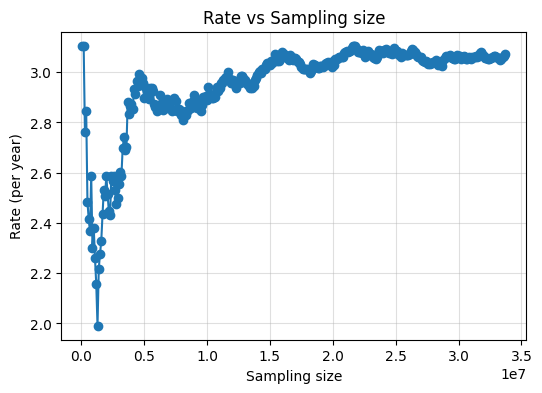

In [27]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [31]:
# select only events after sampling size of 2.3e7
idx = np.where(meta_data['events_total'] > 2.3e7)[0]
# take average of the rate after 2.3e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 3.0621442247433555


* Conclusion is, you will need at-least 30 million samples to get a good estimate of detection rate for BNS events.

* You can get away with lesser sample if you set z_max=5, but that is not a realistic scenario.

* Rate obtained from the simulation (super-threshold) is ~3.06 detectable BNS events per year.

### Sub

In [24]:
# snr_cut=6.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=100000,snr_threshold=6.0, output_jsonfile='n_unlensed_detectable_bns_sub.json', meta_data_file='n_unlensed_detectable_bns_sub_meta.json', resume=True);

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_sub.json

 trmming final result to size=1000


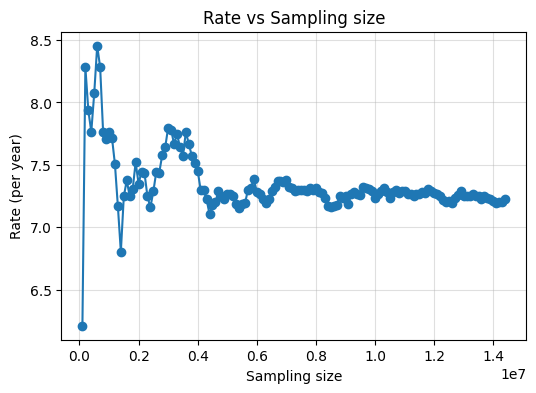

In [32]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_sub_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [33]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 1e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 7.254233879342404


* Rate obtained from the simulation (sub+super-threshold) is ~7.25 detectable BNS events per year.

* This is 2.37 times higher than the rate obtained from the super-threshold events. 

## Lensed events

In [37]:
ler = LeR(verbose=False, event_type='BNS', mtot_max=51, z_max=10)

In [42]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=100000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  501.0


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3898.20it/s]


collected number of events =  503.0
total number of events =  16400000
total lensed rate (yr^-1): 0.007621251359076047


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  507.0
total number of events =  16500000
total lensed rate (yr^-1): 0.007635301018187302


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.85it/s]


collected number of events =  512.0
total number of events =  16600000
total lensed rate (yr^-1): 0.007664150448141243


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4004.44it/s]


collected number of events =  514.0
total number of events =  16700000
total lensed rate (yr^-1): 0.007648016149387203


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  519.0
total number of events =  16800000
total lensed rate (yr^-1): 0.007676446448441693


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.47s/it]


collected number of events =  522.0
total number of events =  16900000
total lensed rate (yr^-1): 0.007675133651908457


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


collected number of events =  525.0
total number of events =  17000000
total lensed rate (yr^-1): 0.007673836300040318


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  532.0
total number of events =  17100000
total lensed rate (yr^-1): 0.007730679531892469


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  534.0
total number of events =  17200000
total lensed rate (yr^-1): 0.007714627456452493


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.38s/it]


collected number of events =  537.0
total number of events =  17300000
total lensed rate (yr^-1): 0.007713124314128055


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]


collected number of events =  544.0
total number of events =  17400000
total lensed rate (yr^-1): 0.0077687616970742055


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  548.0
total number of events =  17500000
total lensed rate (yr^-1): 0.007781165602304828


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.23it/s]


collected number of events =  549.0
total number of events =  17600000
total lensed rate (yr^-1): 0.007751072964099165


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]


collected number of events =  550.0
total number of events =  17700000
total lensed rate (yr^-1): 0.0077213203557037376


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.04s/it]


collected number of events =  553.0
total number of events =  17800000
total lensed rate (yr^-1): 0.007719821835920709


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  557.0
total number of events =  17900000
total lensed rate (yr^-1): 0.007732221965957091


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.20it/s]


collected number of events =  561.0
total number of events =  18000000
total lensed rate (yr^-1): 0.007744484316770848


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  563.0
total number of events =  18100000
total lensed rate (yr^-1): 0.007729154141298172


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.80s/it]


collected number of events =  567.0
total number of events =  18200000
total lensed rate (yr^-1): 0.007741298597183529


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.82s/it]


collected number of events =  569.0
total number of events =  18300000
total lensed rate (yr^-1): 0.00772615337291595


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  570.0
total number of events =  18400000
total lensed rate (yr^-1): 0.007697668089791996


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.27it/s]


collected number of events =  574.0
total number of events =  18500000
total lensed rate (yr^-1): 0.007709785803427895


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it]


collected number of events =  579.0
total number of events =  18600000
total lensed rate (yr^-1): 0.0077351326883048485


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


collected number of events =  581.0
total number of events =  18700000
total lensed rate (yr^-1): 0.00772034439882844


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.88s/it]


collected number of events =  584.0
total number of events =  18800000
total lensed rate (yr^-1): 0.007718930778804486


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.53s/it]


collected number of events =  588.0
total number of events =  18900000
total lensed rate (yr^-1): 0.007730679531892468


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4041.64it/s]


collected number of events =  590.0
total number of events =  19000000
total lensed rate (yr^-1): 0.007716148179388912


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]


collected number of events =  593.0
total number of events =  19100000
total lensed rate (yr^-1): 0.007714778732556115


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.52s/it]


collected number of events =  595.0
total number of events =  19200000
total lensed rate (yr^-1): 0.007700481564971013


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  600.0
total number of events =  19300000
total lensed rate (yr^-1): 0.007724957341269306


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.45s/it]


collected number of events =  603.0
total number of events =  19400000
total lensed rate (yr^-1): 0.007723563663398458


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4043.26it/s]


collected number of events =  606.0
total number of events =  19500000
total lensed rate (yr^-1): 0.00772218427965962


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]


collected number of events =  607.0
total number of events =  19600000
total lensed rate (yr^-1): 0.0076954632439374185


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


collected number of events =  609.0
total number of events =  19700000
total lensed rate (yr^-1): 0.007681626996791627


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  612.0
total number of events =  19800000
total lensed rate (yr^-1): 0.007680480314152907


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  616.0
total number of events =  19900000
total lensed rate (yr^-1): 0.007691831896053813


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.46s/it]


collected number of events =  618.0
total number of events =  20000000
total lensed rate (yr^-1): 0.007678221349354627


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.83s/it]


collected number of events =  621.0
total number of events =  20100000
total lensed rate (yr^-1): 0.007677108724901743


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.75s/it]


collected number of events =  629.0
total number of events =  20200000
total lensed rate (yr^-1): 0.007737513583812459


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.71s/it]


collected number of events =  632.0
total number of events =  20300000
total lensed rate (yr^-1): 0.007736119841204145


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  634.0
total number of events =  20400000
total lensed rate (yr^-1): 0.007722559070199304


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.87s/it]


collected number of events =  636.0
total number of events =  20500000
total lensed rate (yr^-1): 0.007709130599399388


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]


collected number of events =  639.0
total number of events =  20600000
total lensed rate (yr^-1): 0.007707894935491261


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  639.0
total number of events =  20700000
total lensed rate (yr^-1): 0.007670658728073428


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  640.0
total number of events =  20800000
total lensed rate (yr^-1): 0.0076457270095639795


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.46s/it]


collected number of events =  643.0
total number of events =  20900000
total lensed rate (yr^-1): 0.007644812448916904


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]


collected number of events =  645.0
total number of events =  21000000
total lensed rate (yr^-1): 0.007632073925618331


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.52s/it]


collected number of events =  648.0
total number of events =  21100000
total lensed rate (yr^-1): 0.007631232740351536


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.04s/it]


collected number of events =  653.0
total number of events =  21200000
total lensed rate (yr^-1): 0.0076538415783241305


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


collected number of events =  656.0
total number of events =  21300000
total lensed rate (yr^-1): 0.007652906095957936


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  661.0
total number of events =  21400000
total lensed rate (yr^-1): 0.007675202359016739


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.52s/it]


collected number of events =  664.0
total number of events =  21500000
total lensed rate (yr^-1): 0.007674176226343752


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.83s/it]


collected number of events =  667.0
total number of events =  21600000
total lensed rate (yr^-1): 0.007673159594899222


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]


collected number of events =  669.0
total number of events =  21700000
total lensed rate (yr^-1): 0.007660701359697919


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


collected number of events =  671.0
total number of events =  21800000
total lensed rate (yr^-1): 0.0076483574202324085


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


collected number of events =  674.0
total number of events =  21900000
total lensed rate (yr^-1): 0.0076474726093378525


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.62s/it]


collected number of events =  680.0
total number of events =  22000000
total lensed rate (yr^-1): 0.007680480314152907


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]


collected number of events =  683.0
total number of events =  22100000
total lensed rate (yr^-1): 0.0076794581581355855


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.43s/it]


collected number of events =  685.0
total number of events =  22200000
total lensed rate (yr^-1): 0.007667252141910726


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


collected number of events =  692.0
total number of events =  22300000
total lensed rate (yr^-1): 0.007710869975116318


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.22it/s]


collected number of events =  695.0
total number of events =  22400000
total lensed rate (yr^-1): 0.007709725840559214


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.31it/s]


collected number of events =  697.0
total number of events =  22500000
total lensed rate (yr^-1): 0.007697548048184358


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.80s/it]


collected number of events =  698.0
total number of events =  22600000
total lensed rate (yr^-1): 0.007674483062476057


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.13s/it]


collected number of events =  699.0
total number of events =  22700000
total lensed rate (yr^-1): 0.007651621292500868


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4054.02it/s]


collected number of events =  700.0
total number of events =  22800000
total lensed rate (yr^-1): 0.0076289600643675674


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  702.0
total number of events =  22900000
total lensed rate (yr^-1): 0.007617347673502279


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.50s/it]


collected number of events =  702.0
total number of events =  23000000
total lensed rate (yr^-1): 0.007584228770574008


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  704.0
total number of events =  23100000
total lensed rate (yr^-1): 0.007572910561853846


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]


collected number of events =  709.0
total number of events =  23200000
total lensed rate (yr^-1): 0.007593821750770603


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  717.0
total number of events =  23300000
total lensed rate (yr^-1): 0.007646547366539255


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.45s/it]


collected number of events =  720.0
total number of events =  23400000
total lensed rate (yr^-1): 0.00764572700956398


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  721.0
total number of events =  23500000
total lensed rate (yr^-1): 0.007623765878791828


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.22it/s]


collected number of events =  725.0
total number of events =  23600000
total lensed rate (yr^-1): 0.007633578078934376


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.64s/it]


collected number of events =  727.0
total number of events =  23700000
total lensed rate (yr^-1): 0.007622338182214048


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  731.0
total number of events =  23800000
total lensed rate (yr^-1): 0.00763207392561833


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4017.30it/s]


collected number of events =  733.0
total number of events =  23900000
total lensed rate (yr^-1): 0.007620934380139661


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.51s/it]


collected number of events =  735.0
total number of events =  24000000
total lensed rate (yr^-1): 0.007609887664206649


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  736.0
total number of events =  24100000
total lensed rate (yr^-1): 0.007588621994554789


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.00s/it]


collected number of events =  739.0
total number of events =  24200000
total lensed rate (yr^-1): 0.007588068117859623


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  739.0
total number of events =  24300000
total lensed rate (yr^-1): 0.007556841500090654


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  744.0
total number of events =  24400000
total lensed rate (yr^-1): 0.007576790126690863


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.98s/it]


collected number of events =  747.0
total number of events =  24500000
total lensed rate (yr^-1): 0.0075762913254975315


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  753.0
total number of events =  24600000
total lensed rate (yr^-1): 0.007606099765916849


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.89s/it]


collected number of events =  755.0
total number of events =  24700000
total lensed rate (yr^-1): 0.007595426173974743


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  758.0
total number of events =  24800000
total lensed rate (yr^-1): 0.007594858261314865


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]


collected number of events =  761.0
total number of events =  24900000
total lensed rate (yr^-1): 0.007594294910202455


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.90s/it]


collected number of events =  764.0
total number of events =  25000000
total lensed rate (yr^-1): 0.007593736065898945


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  765.0
total number of events =  25100000
total lensed rate (yr^-1): 0.007573381983079061


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.41s/it]


collected number of events =  766.0
total number of events =  25200000
total lensed rate (yr^-1): 0.007553189440599019


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


collected number of events =  769.0
total number of events =  25300000
total lensed rate (yr^-1): 0.007552799695119674


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.96s/it]


collected number of events =  770.0
total number of events =  25400000
total lensed rate (yr^-1): 0.007532847181666874


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.91s/it]


collected number of events =  773.0
total number of events =  25500000
total lensed rate (yr^-1): 0.007532540266579258


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


collected number of events =  777.0
total number of events =  25600000
total lensed rate (yr^-1): 0.007541942238633375


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


collected number of events =  782.0
total number of events =  25700000
total lensed rate (yr^-1): 0.007560939764516286


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.59s/it]


collected number of events =  784.0
total number of events =  25800000
total lensed rate (yr^-1): 0.007550896286964737


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  786.0
total number of events =  25900000
total lensed rate (yr^-1): 0.007540930365224396


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  789.0
total number of events =  26000000
total lensed rate (yr^-1): 0.007540598263182475


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3999.08it/s]


collected number of events =  795.0
total number of events =  26100000
total lensed rate (yr^-1): 0.007568830329870089


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.23it/s]


collected number of events =  801.0
total number of events =  26200000
total lensed rate (yr^-1): 0.007596846884598256


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.04s/it]


collected number of events =  803.0
total number of events =  26300000
total lensed rate (yr^-1): 0.007586857818710872


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]


collected number of events =  805.0
total number of events =  26400000
total lensed rate (yr^-1): 0.007576944427565061


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.41s/it]


collected number of events =  807.0
total number of events =  26500000
total lensed rate (yr^-1): 0.007567105854465633


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3987.75it/s]


collected number of events =  810.0
total number of events =  26600000
total lensed rate (yr^-1): 0.007566682839352322


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  813.0
total number of events =  26700000
total lensed rate (yr^-1): 0.007566262992891545


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.53s/it]


collected number of events =  816.0
total number of events =  26800000
total lensed rate (yr^-1): 0.007565846279613311


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.62s/it]


collected number of events =  818.0
total number of events =  26900000
total lensed rate (yr^-1): 0.007556195262054216


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]


collected number of events =  823.0
total number of events =  27000000
total lensed rate (yr^-1): 0.007574225303270836


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  825.0
total number of events =  27100000
total lensed rate (yr^-1): 0.007564614592027093


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


collected number of events =  828.0
total number of events =  27200000
total lensed rate (yr^-1): 0.007564210067182599


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]


collected number of events =  829.0
total number of events =  27300000
total lensed rate (yr^-1): 0.0075456043939625475


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.61it/s]


collected number of events =  833.0
total number of events =  27400000
total lensed rate (yr^-1): 0.007554341038920469


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.00it/s]


collected number of events =  836.0
total number of events =  27500000
total lensed rate (yr^-1): 0.007553978285449212


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  841.0
total number of events =  27600000
total lensed rate (yr^-1): 0.0075716244017720105


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  844.0
total number of events =  27700000
total lensed rate (yr^-1): 0.007571201872647652


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]


collected number of events =  849.0
total number of events =  27800000
total lensed rate (yr^-1): 0.007588659083143674


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.53s/it]


collected number of events =  852.0
total number of events =  27900000
total lensed rate (yr^-1): 0.0075881785266962935


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  854.0
total number of events =  28000000
total lensed rate (yr^-1): 0.007578826898230295


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  857.0
total number of events =  28100000
total lensed rate (yr^-1): 0.0075783847520954


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  858.0
total number of events =  28200000
total lensed rate (yr^-1): 0.007560322612116722


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]


collected number of events =  861.0
total number of events =  28300000
total lensed rate (yr^-1): 0.007559948976859508


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  864.0
total number of events =  28400000
total lensed rate (yr^-1): 0.0075595779728364985


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]


collected number of events =  866.0
total number of events =  28500000
total lensed rate (yr^-1): 0.007550490760848358


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.70s/it]


collected number of events =  870.0
total number of events =  28600000
total lensed rate (yr^-1): 0.0075588437480916615


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  871.0
total number of events =  28700000
total lensed rate (yr^-1): 0.007541164366663149


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


collected number of events =  871.0
total number of events =  28800000
total lensed rate (yr^-1): 0.00751497976816779


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.11s/it]


collected number of events =  875.0
total number of events =  28900000
total lensed rate (yr^-1): 0.007523368921608155


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.08s/it]


collected number of events =  877.0
total number of events =  29000000
total lensed rate (yr^-1): 0.0075145632444861155


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3956.65it/s]


collected number of events =  881.0
total number of events =  29100000
total lensed rate (yr^-1): 0.0075228961718673765


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3972.14it/s]


collected number of events =  883.0
total number of events =  29200000
total lensed rate (yr^-1): 0.007514152426608299


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]


collected number of events =  885.0
total number of events =  29300000
total lensed rate (yr^-1): 0.0075054683656172


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  886.0
total number of events =  29400000
total lensed rate (yr^-1): 0.007488391470761728


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.02s/it]


collected number of events =  889.0
total number of events =  29500000
total lensed rate (yr^-1): 0.007488276868604315


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4025.55it/s]


collected number of events =  890.0
total number of events =  29600000
total lensed rate (yr^-1): 0.007471373437555342


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


collected number of events =  893.0
total number of events =  29700000
total lensed rate (yr^-1): 0.007471316906904734


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]


collected number of events =  895.0
total number of events =  29800000
total lensed rate (yr^-1): 0.007462922294989674


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]


collected number of events =  898.0
total number of events =  29900000
total lensed rate (yr^-1): 0.007462894407161362


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.93it/s]


collected number of events =  905.0
total number of events =  30000000
total lensed rate (yr^-1): 0.007495998188960019


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  908.0
total number of events =  30100000
total lensed rate (yr^-1): 0.007495860599741961


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4020.96it/s]


collected number of events =  912.0
total number of events =  30200000
total lensed rate (yr^-1): 0.007503951939187958


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


collected number of events =  913.0
total number of events =  30300000
total lensed rate (yr^-1): 0.007487387283540831


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.65s/it]


collected number of events =  916.0
total number of events =  30400000
total lensed rate (yr^-1): 0.007487279377457884


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.37it/s]


collected number of events =  922.0
total number of events =  30500000
total lensed rate (yr^-1): 0.007511613437429006


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4036.13it/s]


collected number of events =  927.0
total number of events =  30600000
total lensed rate (yr^-1): 0.007527667989563359


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.95s/it]


collected number of events =  929.0
total number of events =  30700000
total lensed rate (yr^-1): 0.007519335919747898


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  931.0
total number of events =  30800000
total lensed rate (yr^-1): 0.007511057954281887


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  932.0
total number of events =  30900000
total lensed rate (yr^-1): 0.0074947919456211315


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4050.29it/s]


collected number of events =  934.0
total number of events =  31000000
total lensed rate (yr^-1): 0.00748664656049402


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  937.0
total number of events =  31100000
total lensed rate (yr^-1): 0.007486543464911482


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  940.0
total number of events =  31200000
total lensed rate (yr^-1): 0.007486441030198064


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  942.0
total number of events =  31300000
total lensed rate (yr^-1): 0.007478400396095887


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  950.0
total number of events =  31400000
total lensed rate (yr^-1): 0.007517892401919996


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  955.0
total number of events =  31500000
total lensed rate (yr^-1): 0.0075334683193441915


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  957.0
total number of events =  31600000
total lensed rate (yr^-1): 0.007525355199840622


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.28it/s]


collected number of events =  959.0
total number of events =  31700000
total lensed rate (yr^-1): 0.007517293267210894


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]


collected number of events =  961.0
total number of events =  31800000
total lensed rate (yr^-1): 0.0075092820385599685


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3980.37it/s]


collected number of events =  965.0
total number of events =  31900000
total lensed rate (yr^-1): 0.0075169001046222665


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.65s/it]


collected number of events =  966.0
total number of events =  32000000
total lensed rate (yr^-1): 0.007501174983289411


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  970.0
total number of events =  32100000
total lensed rate (yr^-1): 0.0075087708403895476


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  973.0
total number of events =  32200000
total lensed rate (yr^-1): 0.007508602557762017


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


collected number of events =  979.0
total number of events =  32300000
total lensed rate (yr^-1): 0.007531514524049595


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  983.0
total number of events =  32400000
total lensed rate (yr^-1): 0.007538946408581643


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.50s/it]


collected number of events =  987.0
total number of events =  32500000
total lensed rate (yr^-1): 0.007546332558439648


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.10it/s]


collected number of events =  993.0
total number of events =  32600000
total lensed rate (yr^-1): 0.007568917942213298


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]


collected number of events =  996.0
total number of events =  32700000
total lensed rate (yr^-1): 0.007568568296623426


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4020.39it/s]


collected number of events =  999.0
total number of events =  32800000
total lensed rate (yr^-1): 0.007568220783018857


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  1001.0
total number of events =  32900000
total lensed rate (yr^-1): 0.007560322612116722
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns.json

 trmming final result to size=1000


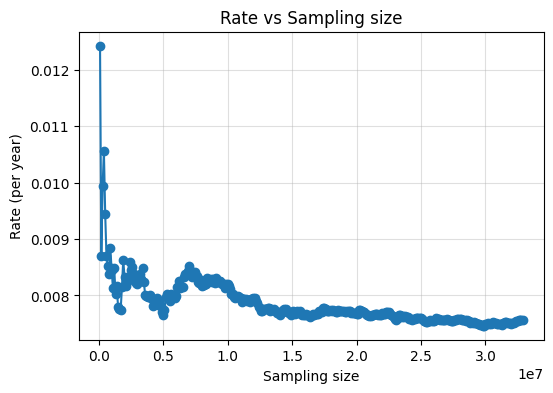

In [44]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [45]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 2e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 0.007576792374189939


* Rate obtained from the simulation (super-threshold) is ~0.0076 detectable BNS events per year.

In [146]:
# snr_cut=6.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=3500, batch_size=100000,snr_threshold=6.0, num_img=2, output_jsonfile='n_lensed_detectable_bns_sub.json', meta_data_file='n_lensed_detectable_bns__sub_meta.json', resume=True);

collected number of detectable events =  3575.0
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_sub.json

 trmming final result to size=3500


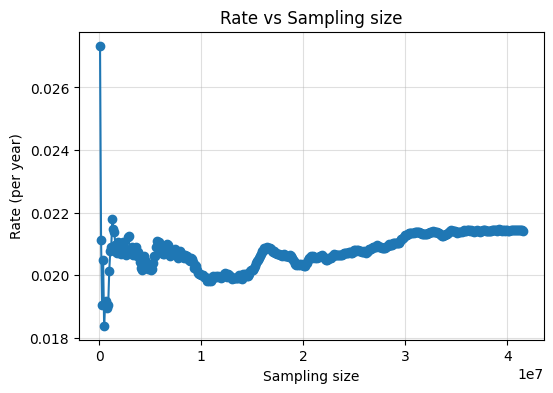

In [147]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns__sub_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [148]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 3e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 0.0213948570740686


In [149]:
0.0213948570740686/0.007576792374189939

2.8237354301735107

* Rate obtained from the simulation (sub+super-threshold) is ~0.02 detectable BNS events per year.

* This is 2.8 times higher than the rate obtained from the super-threshold events. 

### sup

In [150]:
sup_lensed = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# get snrs
sup_snrs = sup_lensed['optimal_snr_net']

# check each row for 3 and 4 images with snr>8
sup_idx_2 = np.where(np.sum(sup_snrs>8, axis=1)==2)[0]
sup_idx_3 = np.where(np.sum(sup_snrs>8, axis=1)==3)[0]
sup_idx_4 = np.where(np.sum(sup_snrs>8, axis=1)==4)[0]

print('Total number of detectable events:', len(sup_snrs))
print('\nNumber of events with detectable 2 images or more:', len(sup_idx_2))
print(f'Total/2_images: {len(sup_idx_2)/len(sup_snrs)*100}%')
print('\nNumber of events with detectable 3 images or more:', len(sup_idx_3))
print(f'Total/3_images: {len(sup_idx_3)/len(sup_snrs)*100}%')
print('\nNumber of events with detectable 4 images:', len(sup_idx_4))
print(f'Total/4_images: {len(sup_idx_4)/len(sup_snrs)*100}%')

Total number of detectable events: 1000

Number of events with detectable 2 images or more: 949
Total/2_images: 94.89999999999999%

Number of events with detectable 3 images or more: 45
Total/3_images: 4.5%

Number of events with detectable 4 images: 6
Total/4_images: 0.6%


In [151]:
sub_lensed = get_param_from_json('ler_data/n_lensed_detectable_bns_sub.json')

# get snrs
sub_snrs = sub_lensed['optimal_snr_net']

# check each row for 3 and 4 images with snr>6
sub_idx_2 = np.where(np.sum(sub_snrs>6, axis=1)==2)[0]
sub_idx_3 = np.where(np.sum(sub_snrs>6, axis=1)==3)[0]
sub_idx_4 = np.where(np.sum(sub_snrs>6, axis=1)==4)[0]

print('Total number of detectable events:', len(sub_snrs))
print('\nNumber of events with detectable 2 images or more:', len(sub_idx_2))
print(f'Total/2_images: {len(sub_idx_2)/len(sub_snrs)*100}%')
print('\nNumber of events with detectable 3 images or more:', len(sub_idx_3))
print(f'Total/3_images: {len(sub_idx_3)/len(sub_snrs)*100}%')
print('\nNumber of events with detectable 4 images:', len(sub_idx_4))
print(f'Total/4_images: {len(sub_idx_4)/len(sub_snrs)*100}%')

Total number of detectable events: 3500

Number of events with detectable 2 images or more: 3313
Total/2_images: 94.65714285714286%

Number of events with detectable 3 images or more: 170
Total/3_images: 4.857142857142857%

Number of events with detectable 4 images: 17
Total/4_images: 0.48571428571428565%


## Time delay distribution

### Lensed sub events

In [159]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_sub.json")

# time delays according to image type difference
# dn0 for [typeI,typeI] or [typeII,typeII]
# dn90 for [typeI,typeII] or [typeI,typeII]
img_type = lensed_params_detectable['image_type']
dt_eff = lensed_params_detectable['effective_geocent_time']
snr_l = lensed_params_detectable['optimal_snr_net']
mu = lensed_params_detectable['magnifications']

In [153]:
dt0 = []
dt90 = []
dmu0 = []
dmu90 = []

list_idx = np.array([[0,1],
                  [0,2],
                  [0,3],
                  [1,2],
                  [1,3],
                  [2,3],])

for j in range(len(img_type)):
    for idx in list_idx:
        dn = abs(img_type[j][idx[0]]-img_type[j][idx[1]])
        snr1 = snr_l[j][idx[0]]
        snr2 = snr_l[j][idx[1]]

        if dn==0 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt0.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
            dmu0.append(abs(mu[j][idx[0]]/mu[j][idx[1]]))
        if dn==1 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt90.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
            dmu90.append(abs(mu[j][idx[0]]/mu[j][idx[1]]))

dt0 = np.array(dt0)
dt90 = np.array(dt90)
dmu0 = np.array(dmu0)
dmu90 = np.array(dmu90)

log_dt0 = np.log10(dt0)
log_dt90 = np.log10(dt90)

### Un-lensed sub events

In [154]:
unlensed_params_detectable = get_param_from_json("ler_data/n_unlensed_detectable_bns_sub.json")

# simulating time delay difference and magnification ratio, for unlensed population
size = 1000

t = unlensed_params_detectable["geocent_time"]
mu = unlensed_params_detectable["luminosity_distance"]

len_ = len(t)
t_ = []
mu_ = []
idx1 = np.random.choice(np.arange(0,len_), size, replace=False)
idx2 = np.random.choice(np.arange(0,len_), size, replace=False)
t_.append(t[idx2] - t[idx1])
mu_.append(mu[idx2] / mu[idx1])

dt_ul = np.abs(np.array(t_).flatten()) / (60 * 60 * 24)  # in days
dmu_ul = np.abs(np.array(mu_).flatten())**2

# unlensed
log_dt_ul = np.log10(dt_ul)
log_dmu_ul = np.log10(dmu_ul)
# avoid inf
idx_nan = np.isinf(log_dt_ul)
log_dt_ul = log_dt_ul[~idx_nan]
log_dmu_ul = log_dmu_ul[~idx_nan]

In [155]:
# kde for time delays
from sklearn.neighbors import KernelDensity

kde_log_dt0 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt0).reshape(-1,1))
kde_log_dt90 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt90).reshape(-1,1))
kde_log_dt_ul = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt_ul).reshape(-1,1))

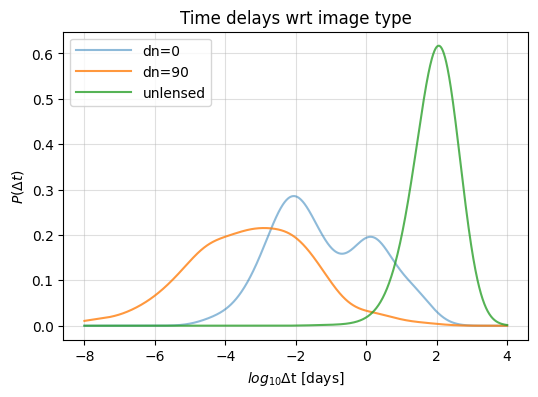

In [156]:
# plot
plt.figure(figsize=(6,4))
dt_log = np.linspace(-8, 4, 1000)
plt.plot(dt_log, np.exp(kde_log_dt0.score_samples(dt_log.reshape(-1,1))), label='dn=0', color='C0', linestyle='-', alpha=0.5)
plt.plot(dt_log, np.exp(kde_log_dt90.score_samples(dt_log.reshape(-1,1))), label='dn=90', color='C1', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_dt_ul.score_samples(dt_log.reshape(-1,1))), label='unlensed', color='C2', linestyle='-', alpha=0.8)

plt.xlabel(r'$log_{10}\Delta$t [days]')
plt.ylabel(r'$P(\Delta t)$')
plt.title('Time delays wrt image type')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
#plt.xlim(-3, 3)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

* time delay distribution for lensed events are very different from the un-lensed events.

* for lensed events the time delay distribution is very broad, with a peak around ~15mins-1day. This very unlike BBH events, where the peak is at ~7-10days.

* This shows lensed BNS events need higher magnification to be detectable. Higher magnification is associated with smaller time delay.

* This can also be simply from the lack of data

## Magnification distribution 

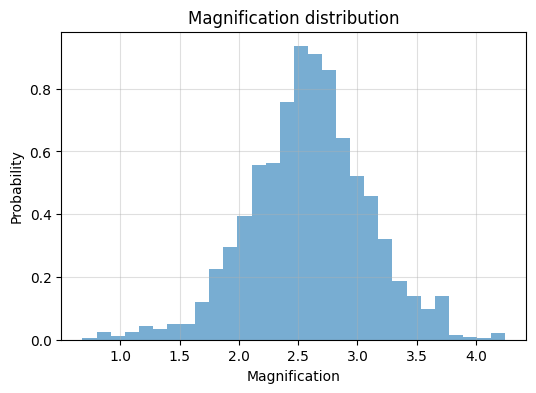

In [3]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr[mu_arr<20000]), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

In [162]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_sub.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>6)[0]])

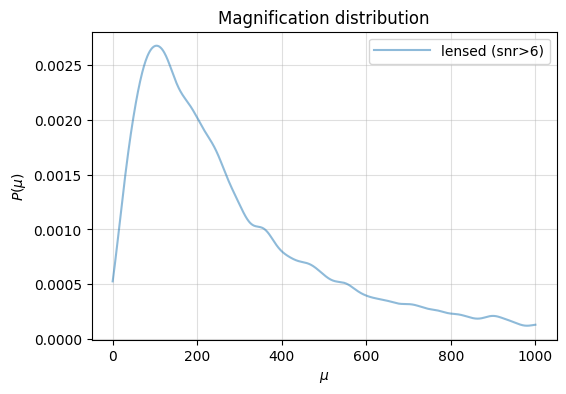

In [168]:
# make kde
from sklearn.neighbors import KernelDensity

kde_mu = KernelDensity(kernel='gaussian', bandwidth=20).fit(mu_arr.reshape(-1,1))

# plot
plt.figure(figsize=(6,4))
mu = np.linspace(0, 1000, 1000)
plt.plot(mu, np.exp(kde_mu.score_samples(mu.reshape(-1,1))), label='lensed (snr>6)', color='C0', linestyle='-', alpha=0.5)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
plt.title('Magnification distribution')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
#plt.xlim(-3, 3)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

* which is quite high as compared to the BBH events.

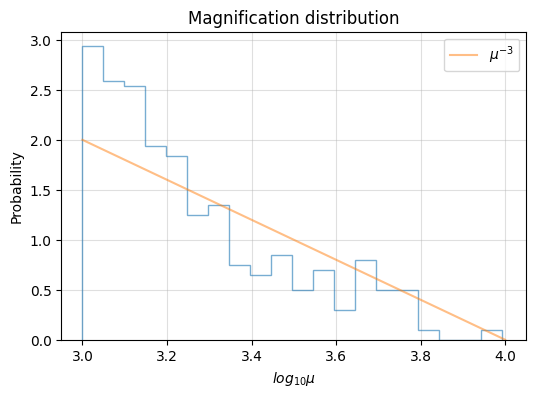

In [23]:
# check mu^-3 distribution relation
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu)
log10_mu = np.log10(mu_arr)
idx = (log10_mu>3) & (log10_mu<4.1)
log10_mu = log10_mu[idx]

# mu^-3
log10_mu_ = np.linspace(3, 4, 100)
mu_ = 10**log10_mu_
pdf_mu = np.log10(mu_**(-2))+8

plt.figure(figsize=(6,4))
plt.hist(log10_mu, bins=20, alpha=0.6, density=True, histtype='step')
plt.plot(log10_mu_, pdf_mu, label=r'$\mu^{-3}$', color='C1', linestyle='-', alpha=0.5)
plt.xlabel(r'$log_{10}\mu$')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [14]:
len(log10_mu)

415